# Embeddings

Let's discuss the input to our model first: So far, with images, its quite clear that similar values on a pixel level correspond to somewhat similar images. Now, how about text?

As discussed in the tokenizer notebook, our words or sub-words that make up a sentence are transformed into individual IDs.
Imagine what would happen if we used these token IDs directly as an input to the neural network: Each input neuron would be activated proportionally to the ID of the token. This would mean that the model would assume that the tokens with similar IDs are somehow more related and that the distance between the token IDs is meaningful. This is, of course, not the case! "House" might have ID 627 and "Bungalow" might be ID 9384, even though they mean similar things and a classifier should be able to classify both words as buildings. Remember that during the training of the tokenizer, we didn't care much about the words semantics, only about the frequency!

Ideally, we would like to represent our words in a way that similar meanings have similar values. This is where **embeddings** come in:
Embeddings are vector representations of our tokens, so that tokens with similar meanings have similar vectors, i.e. closer together in the vector space (called **embedding space**).

## (Optional) Mount folder in Colab

Uncomment the following cell to mount your gdrive if you are using the notebook in google colab:

In [1]:
# Use the following lines if you want to use Google Colab
# We presume you created a folder "i2dl" within your main drive folder, and put the exercise there.
# NOTE: terminate all other colab sessions that use GPU!
# NOTE 2: Make sure the correct exercise folder (e.g exercise_12) is given.

"""
from google.colab import drive
import os

gdrive_path='/content/gdrive/MyDrive/i2dl/exercise_12'

# This will mount your google drive under 'MyDrive'
drive.mount('/content/gdrive', force_remount=True)
# In order to access the files in this notebook we have to navigate to the correct folder
os.chdir(gdrive_path)
# Check manually if all files are present
print(sorted(os.listdir()))
"""

"\nfrom google.colab import drive\nimport os\n\ngdrive_path='/content/gdrive/MyDrive/i2dl/exercise_12'\n\n# This will mount your google drive under 'MyDrive'\ndrive.mount('/content/gdrive', force_remount=True)\n# In order to access the files in this notebook we have to navigate to the correct folder\nos.chdir(gdrive_path)\n# Check manually if all files are present\nprint(sorted(os.listdir()))\n"

## Setup

In [2]:
from exercise_code.util import notebook_util as util
from exercise_code.network import *
from exercise_code.tests import *
import matplotlib.pyplot as plt
import os
import numpy as np
import torch

%load_ext autoreload
%autoreload 2

os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Token Ids vs Embeddings

Let's kick off where we stopped in the last notebook and have a look at the tokens with their raw IDs:

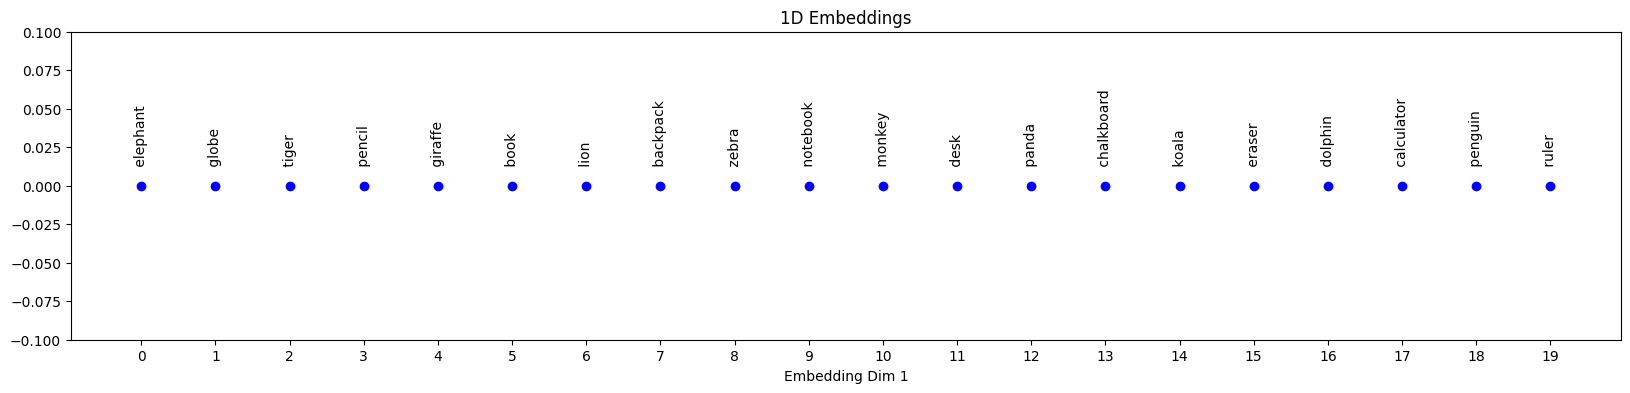

In [3]:
labels, embeddings = util.create_embeddings(1, token_id=True)
util.plot_embeddings(labels, embeddings, integer=True)

So the first idea you might have is to reorder the IDs and to group similar words together, assuming we could somehow "measure" similarity between two words! Let's have a look at what this could look like:

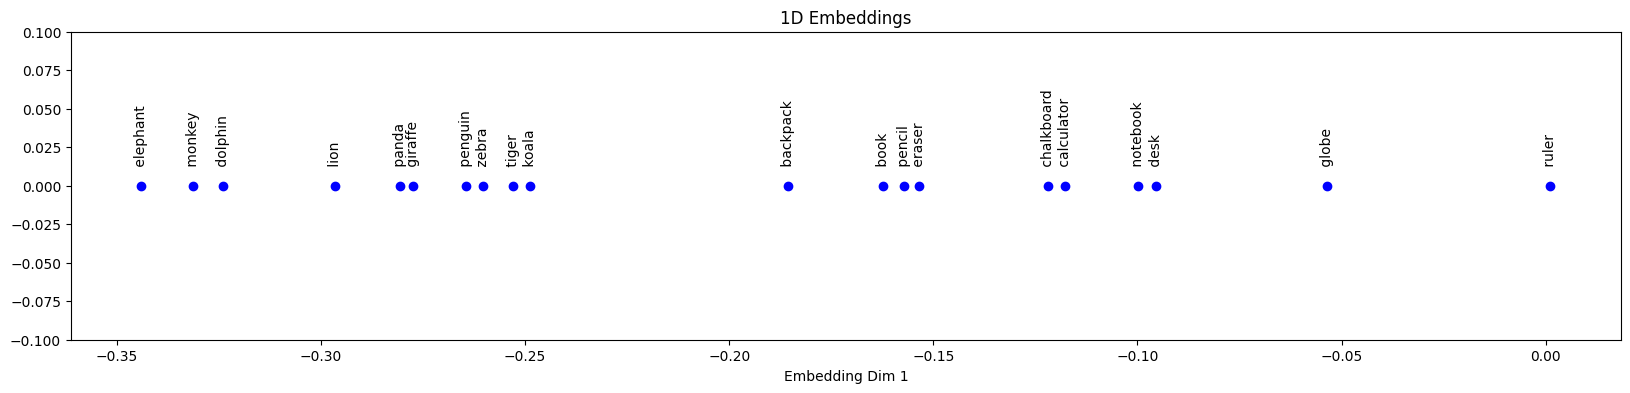

In [4]:
labels, embeddings = util.create_embeddings(1)
util.plot_embeddings(labels, embeddings)

Even with this relatively simple algorithm, we can already see certain groups form. On the right we have school related words, on the left we have animals. 

What we have actually just created are basically 1D Embeddings!

However, with 1D Embeddings we can't really encode more complicated relationships, like for example a triangle relationship, where three words are all equally similar to each other. By adding dimensions to our embedding, we can see more complex connections between word pairs. In 2D this could look like this:

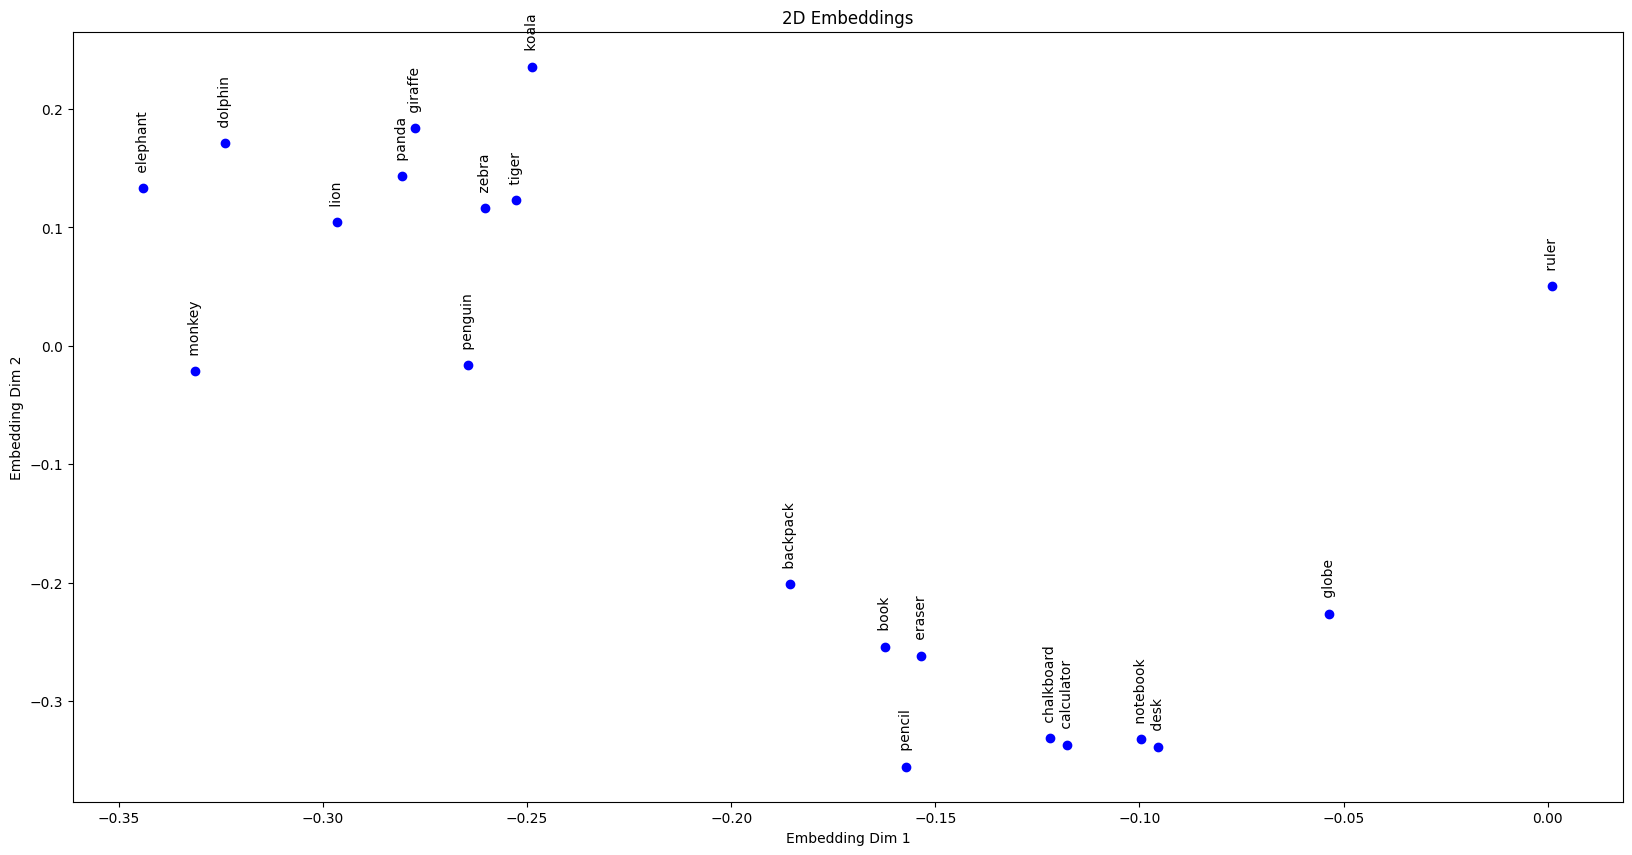

In [5]:
labels, embeddings = util.create_embeddings(2)
util.plot_embeddings(labels, embeddings)

In our transformer model, we will actually create an embedding with 512 dimensions! And we won't even have to define a similarity function between words, during training the model will decide on its own where to place words in the embedding space!

At the end of the day, the embedding layer is a simple lookup table that maps each token ID to these embedding vectors.

If you are more interested in Embeddings, go check out this awesome tool, that let's you play around with word embeddings: http://vectors.nlpl.eu/explore/embeddings/en/

Also, Computerphile made a nice video on vector embeddings, you can find it here: https://www.youtube.com/watch?v=gQddtTdmG_8

<div class="alert alert-warning">
    <h3>WARNING: Task Implementation</h3>
    <p>Throughout this notebook you will as always have to complete several tasks to complete the individual modules! Please be aware though, that some Modules may have several tasks that have to be completed, but please <strong>only</strong> concentrate on the <strong>current task</strong> and the <strong>corresponding hints</strong> (if there are any;). In other words, if you are working on Task 1, and there is also Task 4 in the TODOs of that Module, you don't have to work on it at this moment! <br>
    Also, if we mention any specific pytorch modules in the task description or hints, you <strong>are allowed to use them!</strong> With that said, let's work on your first task!
    </p>
</div>

<div class="alert alert-info">
    <h3>Task 1: Implement</h3>
    <p>Implement the class <code>Embedding</code> in <code>exercise_code/network/embedding.py</code>.
    </p>
</div>

In [7]:
_ = test_task_1()


####### Testing Started #######

Test EmbeddingShapeTest: passed!
Test EmbeddingForwardShapeTest: passed!
Test EmbeddingValueTest: passed!

####### Testing Finished #######
Test TestTask1: passed! -->  Tests passed: 3/3
Score: 100/100


That was it on embeddings! We will add some additional functionality to this module down the line, but we first have to discuss the most important part of our future transformer: Attention! See you in notebook 3!